# w's fijos

In [2]:
library("pheatmap")
library('dplyr')
library('ggplot2')
library('abind')
library('deSolve')
library('corrplot')
library('matrixcalc')
library('mbend')
library('readr')
library('nortest')
library('kableExtra')
library('flextable')

In [4]:
source('PortfolioFunctions_v8.R')

# Periodo 2007-2009

In [5]:
# Reading datasets
down.0 <- read.csv('df_down_1999.csv') %>%
  mutate(Date=as.Date(Date, format = "%Y-%m-%d")) %>% 
  filter(Date >= '2007-01-01', Date < '2010-01-01') %>% 
  mutate(Date = as.Date(ifelse(substring(Date,1,4)=='2007', paste('2004', substring(Date,5,10), sep=''),
                          ifelse(substring(Date,1,4)=='2008', paste('2005', substring(Date,5,10), sep=''),
                            ifelse(substring(Date,1,4)=='2009', paste('2006', substring(Date,5,10), sep=''),'')))))

ftse100.0 <- read.csv('df_FTSE_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%Y-%m-%d")) %>% 
  filter(Date >= '2007-01-01', Date < '2010-01-01') %>% 
  mutate(Date = as.Date(ifelse(substring(Date,1,4)=='2007', paste('2004', substring(Date,5,10), sep=''),
                          ifelse(substring(Date,1,4)=='2008', paste('2005', substring(Date,5,10), sep=''),
                            ifelse(substring(Date,1,4)=='2009', paste('2006', substring(Date,5,10), sep=''),'')))))

dax.0 <- read.csv('df_DAX_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%Y-%m-%d")) %>% 
  filter(Date >= '2007-01-01', Date < '2010-01-01') %>% 
  mutate(Date = as.Date(ifelse(substring(Date,1,4)=='2007', paste('2004', substring(Date,5,10), sep=''),
                          ifelse(substring(Date,1,4)=='2008', paste('2005', substring(Date,5,10), sep=''),
                            ifelse(substring(Date,1,4)=='2009', paste('2006', substring(Date,5,10), sep=''),'')))))

sp500.0 <- read.csv('df_S&P500_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%Y-%m-%d")) %>% 
  filter(Date >= '2007-01-01', Date < '2010-01-01') %>% 
  mutate(Date = as.Date(ifelse(substring(Date,1,4)=='2007', paste('2004', substring(Date,5,10), sep=''),
                          ifelse(substring(Date,1,4)=='2008', paste('2005', substring(Date,5,10), sep=''),
                            ifelse(substring(Date,1,4)=='2009', paste('2006', substring(Date,5,10), sep=''),'')))))

nasdaq.0 <- read.csv('df_NASDAQ_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%d/%m/%Y")) %>% 
  filter(Date >= '2007-01-01', Date < '2010-01-01') %>% 
  select(-HSKA) %>% 
  mutate(Date = as.Date(ifelse(substring(Date,1,4)=='2007', paste('2004', substring(Date,5,10), sep=''),
                          ifelse(substring(Date,1,4)=='2008', paste('2005', substring(Date,5,10), sep=''),
                            ifelse(substring(Date,1,4)=='2009', paste('2006', substring(Date,5,10), sep=''),'')))))

nasdaqETF.0 <- read.csv('df_NASDAQ.ETF_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%d/%m/%Y")) %>% 
  filter(Date >= '2007-01-01', Date < '2010-01-01') %>% 
  mutate(Date = as.Date(ifelse(substring(Date,1,4)=='2007', paste('2004', substring(Date,5,10), sep=''),
                          ifelse(substring(Date,1,4)=='2008', paste('2005', substring(Date,5,10), sep=''),
                            ifelse(substring(Date,1,4)=='2009', paste('2006', substring(Date,5,10), sep=''),'')))))

nyse.0 <- read.csv('df_NYSE_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%d/%m/%Y")) %>% 
  filter(Date >= '2007-01-01', Date < '2010-01-01') %>% select(-AIG, -BAC, -AEG, -BIG, -BDN, -BBVA, -AWR, -AME, -AFL) %>% 
  mutate(Date = as.Date(ifelse(substring(Date,1,4)=='2007', paste('2004', substring(Date,5,10), sep=''),
                          ifelse(substring(Date,1,4)=='2008', paste('2005', substring(Date,5,10), sep=''),
                            ifelse(substring(Date,1,4)=='2009', paste('2006', substring(Date,5,10), sep=''),'')))))


In [6]:
# Reading datasets
down.1 <- read.csv('df_down_1999.csv') %>%
  mutate(Date=as.Date(Date, format = "%Y-%m-%d")) %>% 
  filter(Date >= '2007-01-01', Date < '2010-01-01')

ftse100.1 <- read.csv('df_FTSE_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%Y-%m-%d")) %>% 
  filter(Date >= '2007-01-01', Date < '2010-01-01')

dax.1 <- read.csv('df_DAX_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%Y-%m-%d")) %>% 
  filter(Date >= '2007-01-01', Date < '2010-01-01') 


sp500.1 <- read.csv('df_S&P500_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%Y-%m-%d")) %>% 
  filter(Date >= '2007-01-01', Date < '2010-01-01')  

nasdaq.1 <- read.csv('df_NASDAQ_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%d/%m/%Y")) %>% 
  filter(Date >= '2007-01-01', Date < '2010-01-01') %>% 
  select(-HSKA)

nasdaqETF.1 <- read.csv('df_NASDAQ.ETF_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%d/%m/%Y")) %>% 
  filter(Date >= '2007-01-01', Date < '2010-01-01') 

nyse.1 <- read.csv('df_NYSE_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%d/%m/%Y")) %>% 
  filter(Date >= '2007-01-01', Date < '2010-01-01') %>% select(-AIG, -BAC, -AEG, -BIG, -BDN, -BBVA, -AWR, -AME, -AFL)


In [7]:
# Reading datasets
down <- rbind(down.0, down.1) %>% filter(!is.na(Date))
ftse100 <- rbind(ftse100.0, ftse100.1) %>% filter(!is.na(Date))
dax <- rbind(dax.0, dax.1) %>% filter(!is.na(Date))
sp500 <- rbind(sp500.0, sp500.1) %>% filter(!is.na(Date))
nasdaq <- rbind(nasdaq.0, nasdaq.1) %>% filter(!is.na(Date))
nasdaqETF <- rbind(nasdaqETF.0, nasdaqETF.1) %>% filter(!is.na(Date))
nyse <- rbind(nyse.0, nyse.1) %>% filter(!is.na(Date))

In [ ]:
################################################################################
######   This code generarte the dataset for multiple cases listed below   #####
################################################################################
# iterates the first k stocks: from 6 to 10
#top_vect <- 6:10
top_vect <- 6:10
# iterates the period of rebalance (in months)
period <- c(36)
# iterates the type of sort from k stocks
sort <- c('mean', 'sr')
# iterates the type of covariance matrix
matrix <- c('mv', 'cor', 'var', 'exp')
# iterates the list od dataset
df_completed <- list('down' = down, 
                     'ftse100' = ftse100,
                     'dax'= dax,
                     'sp500' = sp500, 
                     'nasdaq' = nasdaq,
                     'nasdaqETF' = nasdaqETF,
                     'nyse'= nyse)

# iterates the respective year for each dataset
years_start <- c('2007', '2007', '2007', '2007', '2007', '2007', '2007')
# initial datasets
base.portfolio.ret1 <- NULL
base.portfolio.cum.ret1 <- NULL
# loop for all the iterators
for(j in 1:length(df_completed)){
  for(k in 1:length(period)){
    for(l in 1:length(sort)){
      for(m in 1:length(matrix)){
        for(i in 1:length(top_vect)){
        # mean variance portfolio  
        port.m <- getPortfolio(base = df_completed[[j]], 
                                year_to_start = years_start[j], 
                                rebalance_period = period[k], 
                                mod = matrix[m], 
                                sorted= sort[l] , 
                                top.k = top_vect[i])
        # Min portfolio returns
        names <- c('date', 'sorted_by', 'rebalance_period', 'base', 'top', 'matrix' ,'min.port.ret')
        portfolio.ret <- data.frame('date' = port.m$df.port.ret$date,
                                    'sorted_by' = sort[l],
                                    'rebalance_period' = period[k],
                                    'base' = names(df_completed)[j],
                                    'top' = top_vect[i],
                                    'matrix' = matrix[m],
                                    'min.port.ret'= port.m$df.port.ret$min.ret) 
        # Cummulative returns
        port.cum.ret <- portfolio.ret %>%
          mutate('cum.port' = cumsum(min.port.ret)) %>%
          dplyr::select(-min.port.ret)
        ## colnames
        colnames(portfolio.ret) <- names
        colnames(port.cum.ret) <- names 
        # join tables
        base.portfolio.ret1 <- rbind(base.portfolio.ret1, portfolio.ret)
        base.portfolio.cum.ret1 <- rbind(base.portfolio.cum.ret1, port.cum.ret)
        # remove from the work space
        rm(portfolio.ret, port.cum.ret)
        }
      }
    }
  }
}

In [79]:
saveRDS(base.portfolio.ret1, './base.portfolio.ret.2007_2009.rds')
saveRDS(base.portfolio.cum.ret1, './base.portfolio.cum.ret.2007_2009.rds')

In [72]:
readRDS('./base.portfolio.ret.2007_2009.rds')

ERROR: Error in readRDS(base.portfolio.ret1, "C:/Users/HP/Desktop/Indices/base.portfolio.ret.2007_2009.rds"): bad 'file' argument


In [9]:
head(base.portfolio.ret1) 

,date,sorted_by,rebalance_period,base,top,matrix,min.port.ret
,<date>,<chr>,<dbl>,<chr>,<int>,<chr>,<dbl>
1,2007-01-03,mean,36,down,6,mv,0.331175336
2,2007-01-04,mean,36,down,6,mv,0.017476094
3,2007-01-05,mean,36,down,6,mv,-0.031924370
4,2007-01-08,mean,36,down,6,mv,0.006741458
5,2007-01-09,mean,36,down,6,mv,-0.008047853
6,2007-01-10,mean,36,down,6,mv,0.005379369


In [10]:
# Change labels
base.portfolio.ret <- base.portfolio.ret1 %>% 
   filter(sorted_by=='mean') %>% 
   mutate(base = ifelse(base == 'down', 'DJIA', 
                            ifelse(base == 'ftse100', 'FTSE100', 
                                   ifelse(base == 'dax', 'DAX', 
                                          ifelse(base == 'nasdaq', 'NASDAQ',
                                                 ifelse(base == 'sp500', 'S&P500',
                                                        ifelse(base == 'nasdaqETF', 'NASDAQ (ETFs)',
                                                               ifelse(base == 'nyse', 'NYSE', ''))))))))

# cum ret
base.portfolio.cum.ret <- base.portfolio.cum.ret1 %>% 
   filter(sorted_by=='mean') %>% 
   mutate(base = ifelse(base == 'down', 'DJIA', 
                            ifelse(base == 'ftse100', 'FTSE100', 
                                   ifelse(base == 'dax', 'DAX', 
                                          ifelse(base == 'nasdaq', 'NASDAQ',
                                                 ifelse(base == 'sp500', 'S&P500',
                                                        ifelse(base == 'nasdaqETF', 'NASDAQ (ETFs)',
                                                               ifelse(base == 'nyse', 'NYSE', ''))))))))

In [11]:
base.port.ret.by_year <- base.portfolio.ret %>% 
    mutate('year'=as.numeric(substring(date,1,4))) %>% 
    select(-date, -sorted_by, -rebalance_period) %>% 
    rename('Index'=base, 'Stocks_Selected'=top, 'Method'=matrix, 'Year'=year)

In [17]:
base.ret <- base.port.ret.by_year %>%
  group_by(Year, Index, Stocks_Selected, Method) %>% 
  summarize('mean'=mean(min.port.ret),
            'sd' = sd(min.port.ret),
            'sr' = mean/sd) %>%
  ungroup() %>%
  data.frame() %>% 
  arrange(Year, Index, Stocks_Selected, desc(sr)) %>% 
  mutate(Method = ifelse(Method == 'mv','var-cov', 
                    ifelse(Method == 'cor', 'corr',
                      ifelse(Method == 'var', 'var', 'exp'))))


`summarise()` has grouped output by 'Year', 'Index', 'Stocks_Selected'. You can override using the `.groups` argument.



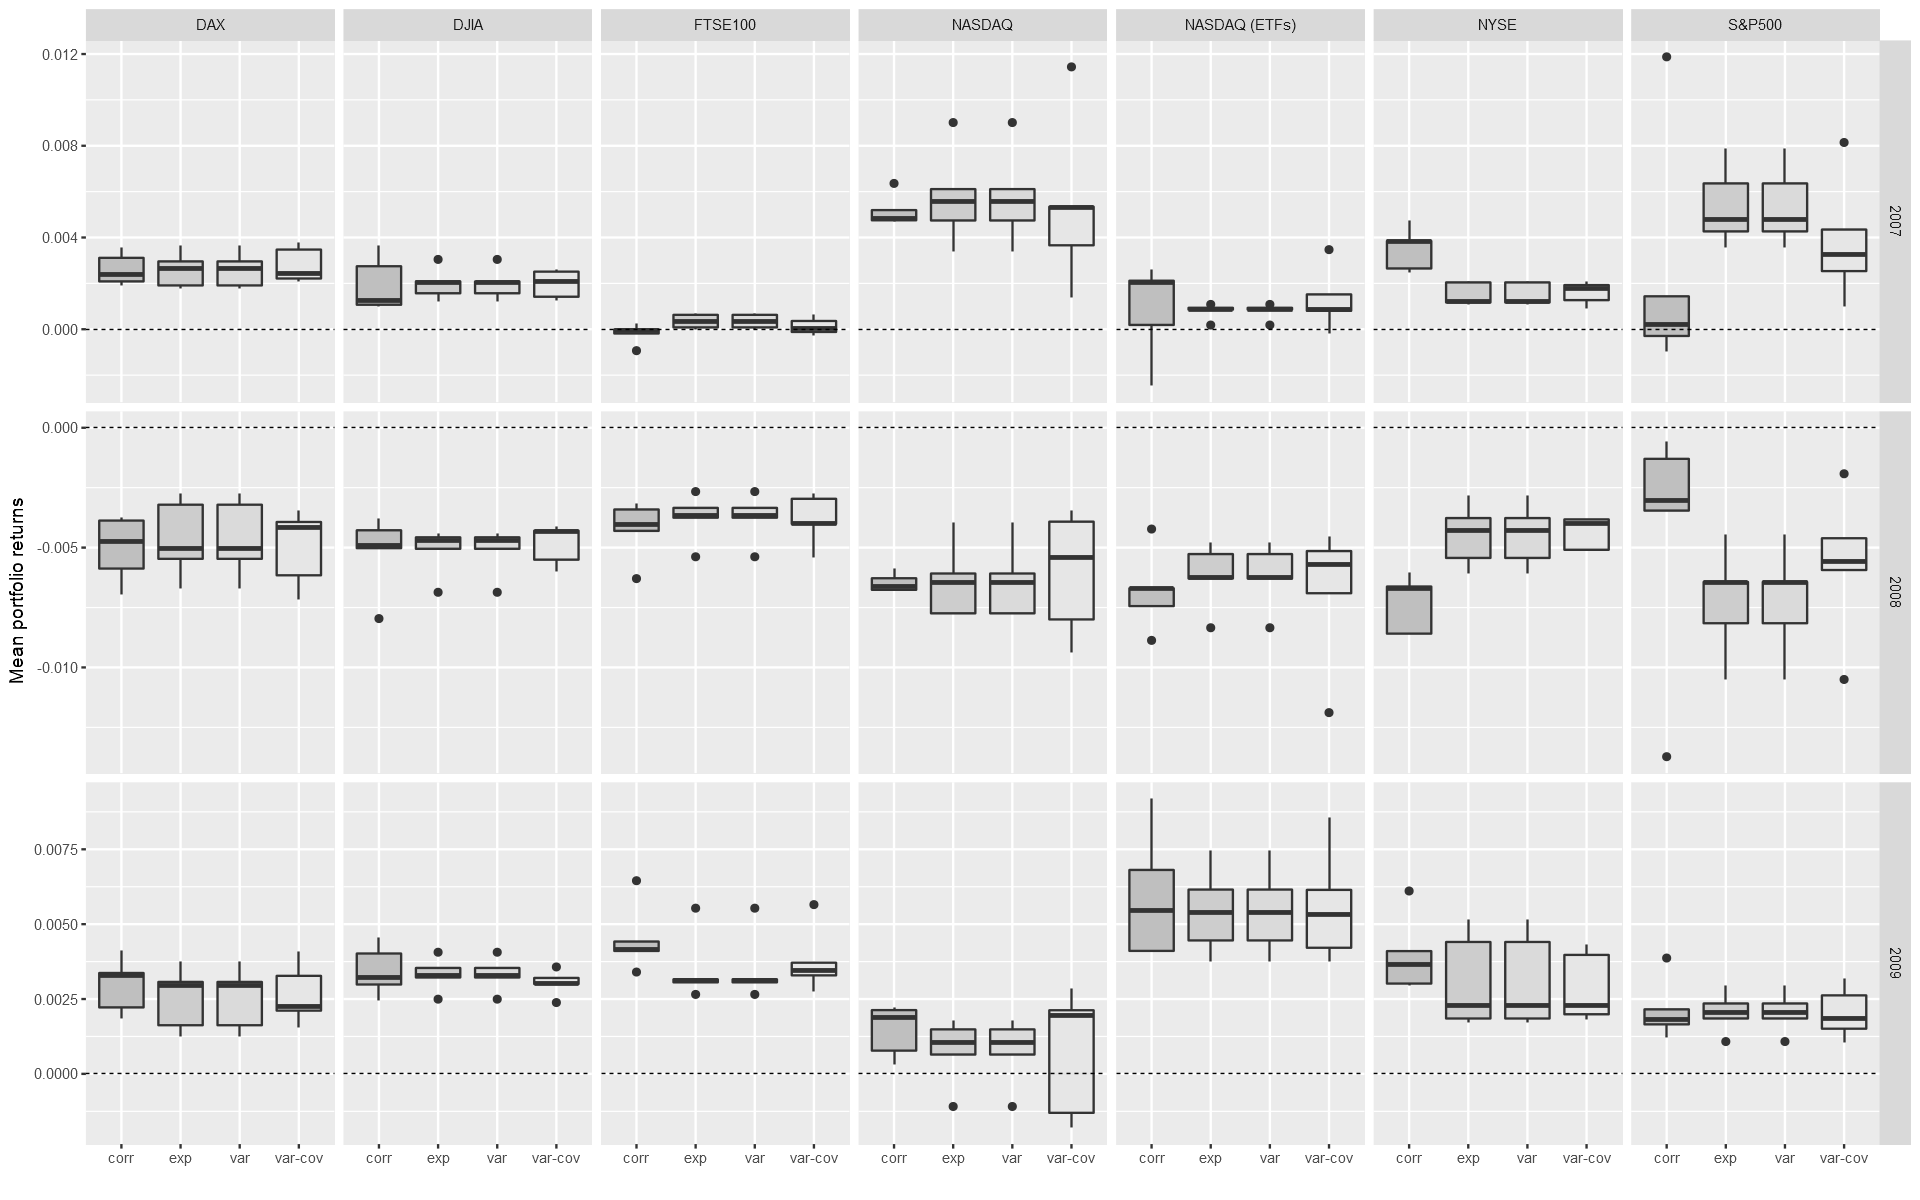

In [19]:
options(repr.plot.width=16, repr.plot.height=10)
b1 <- ggplot(base.ret, aes(x=Method, y=mean, fill=Method)) +
  geom_boxplot() +
  #theme_bw() +
  geom_hline(yintercept=0, linetype="dashed", color = "black", size=0.3) +
  facet_grid(col=vars(Index), row=vars(Year), scale='free') +
  labs(y="Mean portfolio returns", x="") +
  theme(legend.position="none",
        legend.box = "horizontal",
        legend.title = element_blank()) +
  scale_fill_grey(start=0.75, end=0.9)
b1

In [20]:
png(file="./PortfolioReturns_2007_2009_new.png",width=1000, height=600)
b1
dev.off()

png 
  2

# Cumulative returns

In [21]:
base.cum.ret <- base.portfolio.cum.ret %>% filter(sorted_by=='mean') %>% 
    mutate(matrix = ifelse(matrix=='mv', 'var-cov', 
                        ifelse(matrix =='cor', 'cor',
                            ifelse(matrix=='var', 'var', 'exp'))))
head(base.cum.ret)

,date,sorted_by,rebalance_period,base,top,matrix,min.port.ret
,<date>,<chr>,<dbl>,<chr>,<int>,<chr>,<dbl>
1,2007-01-03,mean,36,DJIA,6,var-cov,0.3311753
2,2007-01-04,mean,36,DJIA,6,var-cov,0.3486514
3,2007-01-05,mean,36,DJIA,6,var-cov,0.3167271
4,2007-01-08,mean,36,DJIA,6,var-cov,0.3234685
5,2007-01-09,mean,36,DJIA,6,var-cov,0.3154207
6,2007-01-10,mean,36,DJIA,6,var-cov,0.3208000


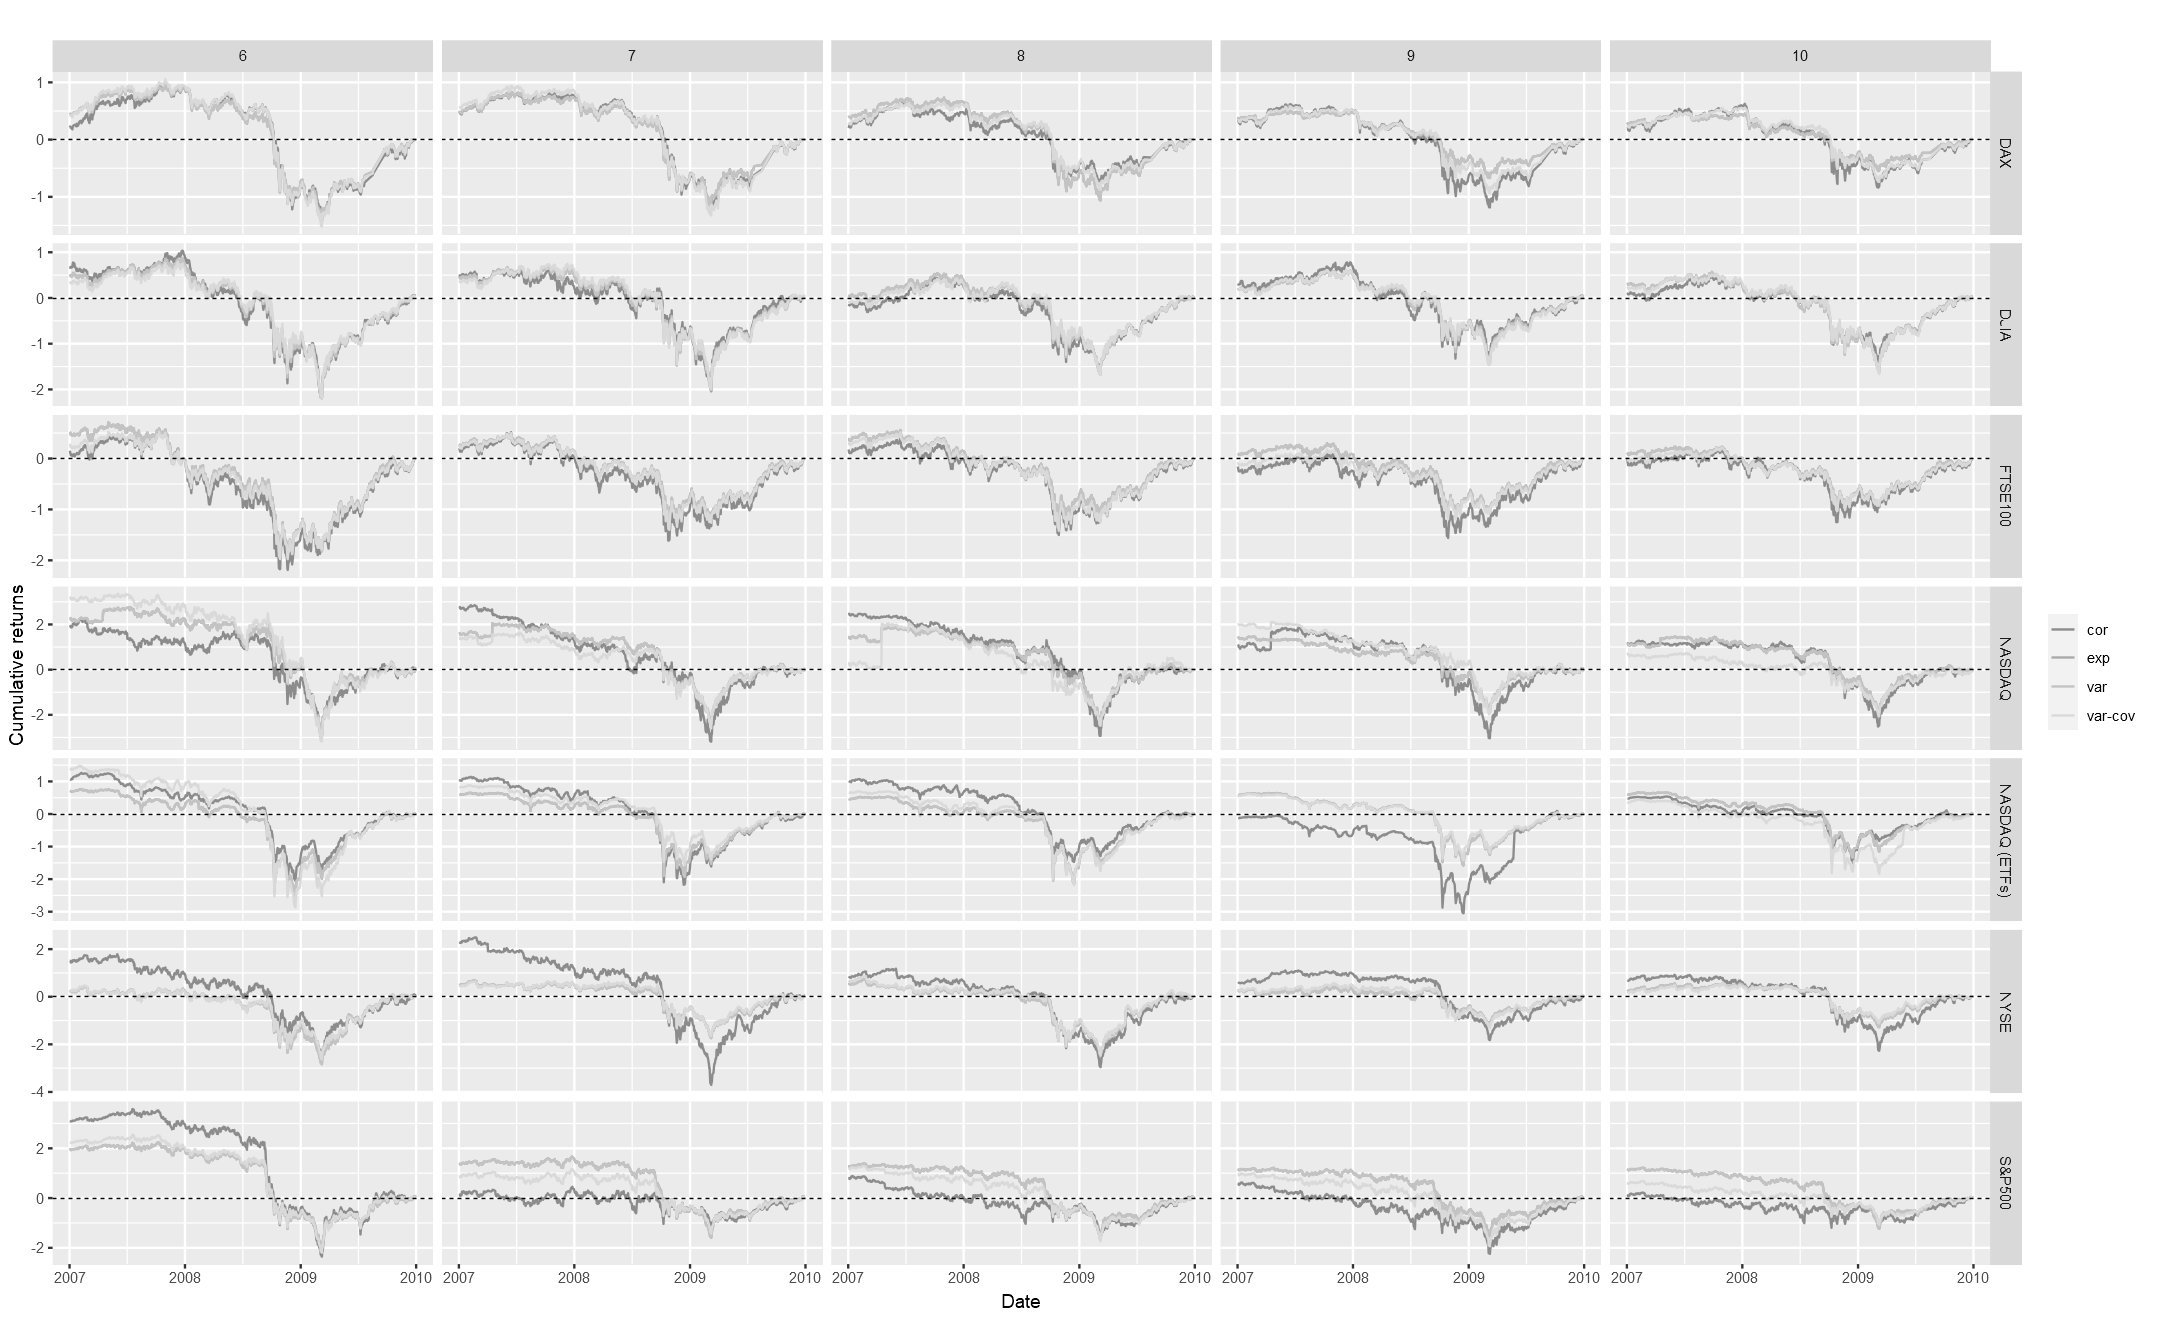

In [23]:
# Cumulative returns
options(repr.plot.width=18, repr.plot.height=11)
p4 <- ggplot(base.cum.ret  , aes(x=date,y=min.port.ret,color=matrix) )+
  geom_line(size=0.5) +
  #theme_bw() +
  #theme_minimal() +
  geom_hline(yintercept=0, linetype="dashed", color = "black", size=0.3) +
  labs(title="",x='Date',y='Cumulative returns') +
  #facet_grid(top ~ .) 
  facet_grid(col=vars(top), row=vars(base), scale="free") +
  theme(#legend.position="none",
        legend.box = "horizontal",
        legend.title = element_blank()) +
  scale_color_grey(start=0.55, end=0.85)
p4

In [24]:
png(file="./PortfolioCumulativeReturns_2007_2009_new.png",width=1000, height=600)
p4
dev.off()

png 
  2

# Test

In [243]:
#*********   t test
summary.port.ret_1 <- base.portfolio.ret %>% 
  filter(matrix != 'cor') %>% 
  select(-sorted_by) %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(year, base, top, matrix) %>% 
  summarize(mean = round(mean(min.port.ret),4),
            sd = round(sd(min.port.ret),4)) %>% 
  ungroup() %>% 
  pivot_wider(names_from = 'matrix', values_from=c('mean', 'sd')) %>% 
  data.frame()
  
# comparación mv-var
t.test_1 <- base.portfolio.ret %>% 
  filter(matrix != 'cor') %>% 
  select(-sorted_by) %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(year, base, top, matrix) %>% 
  summarise(ret = list(min.port.ret)) %>% 
  pivot_wider(names_from = 'matrix', values_from='ret') %>% 
  group_by(base, top) %>% 
  mutate(t_statistic = round(t.test(unlist(mv), unlist(var), var.equal=FALSE)$statistic,4),
         p_value = round(t.test(unlist(mv), unlist(var), var.equal=FALSE)$p.value,4)) %>% 
  select(-mv, -var) %>% 
  data.frame() %>% 
  mutate('sig'= ifelse(p_value < 0.05, "*", 
                      ifelse(p_value < 0.10, "**", 
                        ifelse(p_value < 0.15, "***", ""))))
  
table_summary_1 <- summary.port.ret_1 %>% 
  merge(t.test_1, by=c('year','base', 'top')) %>% 
  arrange(year, base, top)  %>% 
  unite('Mean', mean_mv,mean_var, sep='/') %>% 
  unite('Sd', sd_mv,sd_var, sep='/') %>% 
  #select(-mean_mv, -mean_var, -sd_mv, -sd_var) %>% 
  mutate('Comparison'='mv-var') %>% 
  select(year, base, top, Comparison, Mean, Sd, t_statistic, p_value, sig)


  colnames(table_summary_1) <- c('Year', 'Index', 'Stocks selected' , 'Comparison', 'Mean', 'Sd' ,'Statistic(t)', 'P-value', 'Sig')

`summarise()` has grouped output by 'year', 'base', 'top'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'year', 'base', 'top'. You can override using the `.groups` argument.



In [247]:
#*********   t test
summary.port.ret_2 <- base.portfolio.ret %>% 
  filter(matrix != 'var') %>% 
  select(-sorted_by) %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(year, base, top, matrix) %>% 
  summarize(mean = round(mean(min.port.ret),4),
            sd = round(sd(min.port.ret),4)) %>% 
  ungroup() %>% 
  pivot_wider(names_from = 'matrix', values_from=c('mean', 'sd')) %>% 
  data.frame()
  
# comparación mv-cor
t.test_2 <- base.portfolio.ret %>% 
  filter(matrix != 'var') %>% 
  select(-sorted_by) %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(year, base, top, matrix) %>% 
  summarise(ret = list(min.port.ret)) %>% 
  pivot_wider(names_from = 'matrix', values_from='ret') %>% 
  group_by(base, top) %>% 
  mutate(t_statistic = round(t.test(unlist(mv), unlist(cor), var.equal=FALSE)$statistic, 4),
         p_value = round(t.test(unlist(mv), unlist(cor), var.equal=FALSE)$p.value, 4)) %>% 
  select(-mv, -cor) %>% 
  data.frame() %>% 
  mutate('sig'= ifelse(p_value < 0.05, "*", 
                      ifelse(p_value < 0.10, "**", 
                        ifelse(p_value < 0.15, "***", ""))))
  
table_summary_2 <- summary.port.ret_2 %>% 
  merge(t.test_2, by=c('year','base', 'top')) %>% 
  arrange(year, base, top)  %>% 
  unite('Mean', mean_mv, mean_cor, sep='/') %>% 
  unite('Sd', sd_mv, sd_cor, sep='/') %>% 
  #select(-mean_mv, -mean_var, -sd_mv, -sd_var) %>% 
  mutate('Comparison'='mv-cor') %>% 
  select(year, base, top, Comparison, Mean, Sd, t_statistic, p_value, sig)

colnames(table_summary_2) <- c('Year', 'Index', 'Stocks selected' , 'Comparison', 'Mean', 'Sd' ,'Statistic(t)', 'P-value', 'Sig')

`summarise()` has grouped output by 'year', 'base', 'top'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'year', 'base', 'top'. You can override using the `.groups` argument.



In [248]:
head(table_summary_2)

,Year,Index,Stocks selected,Comparison,Mean,Sd,Statistic(t),P-value,Sig
,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,2007,DAX,6,mv-cor,0.0038/0.0036,0.0373/0.0317,-0.0011,0.9991,
2,2007,DAX,7,mv-cor,0.0035/0.0031,0.041/0.0359,-0.0005,0.9996,
3,2007,DAX,8,mv-cor,0.0025/0.0019,0.0245/0.0248,-0.0023,0.9982,
4,2007,DAX,9,mv-cor,0.0021/0.0021,0.0262/0.0288,-0.0041,0.9968,
5,2007,DAX,10,mv-cor,0.0022/0.0024,0.021/0.0239,-0.0048,0.9962,
6,2007,DJIA,6,mv-cor,0.0026/0.0037,0.0446/0.0546,-0.0033,0.9974,


In [249]:
#*********   t test
summary.port.ret_3 <- base.portfolio.ret %>% 
  filter(matrix != 'mv') %>% 
  select(-sorted_by) %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(year, base, top, matrix) %>% 
  summarize(mean = round(mean(min.port.ret),4),
            sd = round(sd(min.port.ret),4)) %>% 
  ungroup() %>% 
  pivot_wider(names_from = 'matrix', values_from=c('mean', 'sd')) %>% 
  data.frame()
  
# comparación var-cor
t.test_3 <- base.portfolio.ret %>% 
  filter(matrix != 'mv') %>% 
  select(-sorted_by) %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(year, base, top, matrix) %>% 
  summarise(ret = list(min.port.ret)) %>% 
  pivot_wider(names_from = 'matrix', values_from='ret') %>% 
  group_by(base, top) %>% 
  mutate(t_statistic = round(t.test(unlist(var), unlist(cor), var.equal=FALSE)$statistic,4),
         p_value = round(t.test(unlist(var), unlist(cor), var.equal=FALSE)$p.value,4)) %>% 
  select(-var, -cor) %>% 
  data.frame() %>% 
  mutate('sig'= ifelse(p_value < 0.05, "*", 
                      ifelse(p_value < 0.10, "**", 
                        ifelse(p_value < 0.15, "***", ""))))
  
table_summary_3 <- summary.port.ret_3 %>% 
  merge(t.test_3, by=c('year','base', 'top')) %>% 
  arrange(year, base, top)  %>% 
  unite('Mean', mean_var, mean_cor, sep='/') %>% 
  unite('Sd', sd_var, sd_cor, sep='/') %>% 
  #select(-mean_mv, -mean_var, -sd_mv, -sd_var) %>% 
  mutate('Comparison'='var-cor') %>% 
  select(year, base, top, Comparison, Mean, Sd, t_statistic, p_value, sig)

colnames(table_summary_3) <- c('Year', 'Index', 'Stocks selected' , 'Comparison', 'Mean', 'Sd' ,'Statistic(t)', 'P-value', 'Sig')

`summarise()` has grouped output by 'year', 'base', 'top'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'year', 'base', 'top'. You can override using the `.groups` argument.



In [250]:
head(table_summary_3)

,Year,Index,Stocks selected,Comparison,Mean,Sd,Statistic(t),P-value,Sig
,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,2007,DAX,6,var-cor,0.0033/0.0036,0.0395/0.0317,0.0031,0.9975,
2,2007,DAX,7,var-cor,0.0023/0.0031,0.0301/0.0359,0.0006,0.9995,
3,2007,DAX,8,var-cor,0.0029/0.0019,0.0383/0.0248,0.0030,0.9976,
4,2007,DAX,9,var-cor,0.0026/0.0021,0.0308/0.0288,-0.0036,0.9971,
5,2007,DAX,10,var-cor,0.0022/0.0024,0.0283/0.0239,-0.0023,0.9982,
6,2007,DJIA,6,var-cor,0.0036/0.0037,0.0538/0.0546,0.0008,0.9994,


In [251]:
# Unión de tablas
merged_table <- rbind(table_summary_1, table_summary_2, table_summary_3) %>% 
    arrange(Year, Index, across(starts_with('Stocks')),  Comparison)
head(merged_table)

,Year,Index,Stocks selected,Comparison,Mean,Sd,Statistic(t),P-value,Sig
,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,2007,DAX,6,mv-cor,0.0038/0.0036,0.0373/0.0317,-0.0011,0.9991,
2,2007,DAX,6,mv-var,0.0038/0.0033,0.0373/0.0395,-0.0041,0.9967,
3,2007,DAX,6,var-cor,0.0033/0.0036,0.0395/0.0317,0.0031,0.9975,
4,2007,DAX,7,mv-cor,0.0035/0.0031,0.041/0.0359,-0.0005,0.9996,
5,2007,DAX,7,mv-var,0.0035/0.0023,0.041/0.0301,-0.0012,0.9991,
6,2007,DAX,7,var-cor,0.0023/0.0031,0.0301/0.0359,0.0006,0.9995,


# F table

In [184]:
head(summary.port.ret_1)

,year,base,top,mean_mv,mean_var,sd_mv,sd_var
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,2007,DAX,6,0.00379,0.00332,0.03733,0.03952
2,2007,DAX,7,0.00347,0.00225,0.04097,0.03013
3,2007,DAX,8,0.00245,0.00294,0.02455,0.03830
4,2007,DAX,9,0.00209,0.00260,0.02623,0.03085
5,2007,DAX,10,0.00221,0.00225,0.02101,0.02833
6,2007,DJIA,6,0.00262,0.00364,0.04464,0.05382


In [252]:
#*********   F test (compare two variances)
summary.F_1 <- base.portfolio.ret %>% 
  filter(matrix!='cor') %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(year, base, top) %>% 
  summarise('F_statistic'= round(var.test(min.port.ret~matrix, alternative='two.sided', ratio = 1)$statistic,4),
            'F_p.value'= round(var.test(min.port.ret~matrix, alternative='two.sided', ratio = 1)$p.value,4)) %>% 
  ungroup() %>% 
  mutate('sig'= ifelse(F_p.value < 0.05, "*", 
                      ifelse(F_p.value > 0.05 & F_p.value < 0.10, "**", 
                        ifelse(F_p.value > 0.10 & F_p.value < 0.15, "***", "")))) %>% 
  mutate('Comparison'='mv-var')  %>% 
  select(year, base, top, Comparison, F_statistic, F_p.value, sig)

colnames(summary.F_1) <- c('Year', 'Index', 'Stocks selected' ,'Comparison', 'Statistic(F)', 'P-value', 'Sig.F')

`summarise()` has grouped output by 'year', 'base'. You can override using the `.groups` argument.



In [253]:
head(summary.F_1)

Year,Index,Stocks selected,Comparison,Statistic(F),P-value,Sig.F
<dbl>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
2007,DAX,6,mv-var,0.8921,0.3665,
2007,DAX,7,mv-var,1.8490,0.0000,*
2007,DAX,8,mv-var,0.4109,0.0000,*
2007,DAX,9,mv-var,0.7231,0.0105,*
2007,DAX,10,mv-var,0.5501,0.0000,*
2007,DJIA,6,mv-var,0.6881,0.0032,*


In [254]:
#*********   F test (compare two variances)
summary.F_2 <- base.portfolio.ret %>% 
  filter(matrix!='var') %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(year, base, top) %>% 
  summarise('F_statistic'= round(var.test(min.port.ret~matrix, alternative='two.sided', ratio = 1)$statistic,4),
            'F_p.value'= round(var.test(min.port.ret~matrix, alternative='two.sided', ratio = 1)$p.value,4)) %>% 
  ungroup() %>% 
  mutate('sig'= ifelse(F_p.value < 0.05, "*", 
                      ifelse(F_p.value > 0.05 & F_p.value < 0.10, "**", 
                        ifelse(F_p.value > 0.10 & F_p.value < 0.15, "***", "")))) %>% 
  mutate('Comparison'='mv-cor')  %>% 
  select(year, base, top, Comparison, F_statistic, F_p.value, sig)

colnames(summary.F_2) <- c('Year', 'Index', 'Stocks selected' ,'Comparison', 'Statistic(F)', 'P-value', 'Sig.F')

`summarise()` has grouped output by 'year', 'base'. You can override using the `.groups` argument.



In [255]:
head(summary.F_2)

Year,Index,Stocks selected,Comparison,Statistic(F),P-value,Sig.F
<dbl>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
2007,DAX,6,mv-cor,0.7233,0.0105,*
2007,DAX,7,mv-cor,0.7668,0.0359,*
2007,DAX,8,mv-cor,1.0210,0.8693,
2007,DAX,9,mv-cor,1.2063,0.1380,***
2007,DAX,10,mv-cor,1.2978,0.0394,*
2007,DJIA,6,mv-cor,1.4973,0.0015,*


In [256]:
#*********   F test (compare two variances)
summary.F_3 <- base.portfolio.ret %>% 
  filter(matrix!='mv') %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(year, base, top) %>% 
  summarise('F_statistic'= round(var.test(min.port.ret~matrix, alternative='two.sided', ratio = 1)$statistic,4),
            'F_p.value'= round(var.test(min.port.ret~matrix, alternative='two.sided', ratio = 1)$p.value,4)) %>% 
  ungroup() %>% 
  mutate('sig'= ifelse(F_p.value < 0.05, "*", 
                      ifelse(F_p.value > 0.05 & F_p.value < 0.10, "**", 
                        ifelse(F_p.value > 0.10 & F_p.value < 0.15, "***", "")))) %>% 
  mutate('Comparison'='var-cor')  %>% 
  select(year, base, top, Comparison, F_statistic, F_p.value, sig)

colnames(summary.F_3) <- c('Year', 'Index', 'Stocks selected' ,'Comparison', 'Statistic(F)', 'P-value', 'Sig.F')

`summarise()` has grouped output by 'year', 'base'. You can override using the `.groups` argument.



In [257]:
# Unión de tablas
merged_table_F <- rbind(summary.F_1, summary.F_2, summary.F_3) %>% 
    arrange(Year, Index, across(starts_with('Stocks')),  Comparison)
head(merged_table_F)

Year,Index,Stocks selected,Comparison,Statistic(F),P-value,Sig.F
<dbl>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
2007,DAX,6,mv-cor,0.7233,0.0105,*
2007,DAX,6,mv-var,0.8921,0.3665,
2007,DAX,6,var-cor,0.6452,0.0006,*
2007,DAX,7,mv-cor,0.7668,0.0359,*
2007,DAX,7,mv-var,1.8490,0.0000,*
2007,DAX,7,var-cor,1.4178,0.0059,*


In [271]:
# Table result

table_result <- merged_table %>% 
    merge(merged_table_F, by=c('Year', 'Index', 'Stocks selected', 'Comparison')) %>% 
    mutate(Comparison = ifelse(Comparison == 'mv-cor', '(1)-(2)', 
                            ifelse(Comparison == 'mv-var', '(1)-(3)', 
                                ifelse(Comparison == 'var-cor', '(2)-(3)', ''))))  %>% 
    arrange(Year, Index, across(starts_with('Stocks')), Comparison)                            

colnames(table_result) <- c('Year', 'Index', 'Stocks selected', 'Comparison', 'Mean', 'Sd', 'Statistic(t)',	'P-value', 'Sig', 'Statistic(F)', 'P-value.', 'Sig.F')
 

In [259]:
head(table_result)

,Year,Index,Stocks selected,Comparison,Mean,Sd,Statistic(t),P-value,Sig,Statistic(F),P-value,Sig.F
,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,2007,DAX,6,(1)-(2),0.0038/0.0036,0.0373/0.0317,-0.0011,0.9991,,0.7233,0.0105,*
2,2007,DAX,6,(1)-(3),0.0038/0.0033,0.0373/0.0395,-0.0041,0.9967,,0.8921,0.3665,
3,2007,DAX,6,(2)-(3),0.0033/0.0036,0.0395/0.0317,0.0031,0.9975,,0.6452,0.0006,*
4,2007,DAX,7,(1)-(2),0.0035/0.0031,0.041/0.0359,-0.0005,0.9996,,0.7668,0.0359,*
5,2007,DAX,7,(1)-(3),0.0035/0.0023,0.041/0.0301,-0.0012,0.9991,,1.8490,0.0000,*
6,2007,DAX,7,(2)-(3),0.0023/0.0031,0.0301/0.0359,0.0006,0.9995,,1.4178,0.0059,*


In [265]:
Latex_table <- table_result %>%
  kbl(format="latex",
      col.names = colnames(table_result),
      align="r",
      caption="Test", digits=4) %>%
  kable_minimal(full_width = F,  html_font = "Source Sans Pro")

In [ ]:
t.final <- flextable(table_result)
t.final <- autofit(t.final)
save_as_image(t.final, path = "./Test_2007_2020.png")